In [59]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [60]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [67]:


# Read the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission  = pd.read_csv('gender_submission.csv')

In [68]:

df_train["Survived"] = df_train["Survived"].astype(int)

Y_train = df_train["Survived"]

X_train = df_train.drop(labels = ["Survived"],axis = 1)

In [69]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

/Users/yuliangpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yuliangpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yuliangpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/Users/yuliangpeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_

TypeError: barplot() got multiple values for argument 'data'

In [ ]:
full = pd.concat([df_train, df_test], keys=['df_train','df_test'])

In [ ]:
full['LastName'] = full.Name.str.split(',').apply(lambda x: x[0]).str.strip()
full['Title'] = full.Name.str.split("[\,\.]").apply(lambda x: x[1]).str.strip()

In [ ]:
##if the title is Dr and the sex is female, we'll update the Title as Miss
full.loc[(full.Title == 'Dr') & (full.Sex == 'female'), 'Title'] = 'Mrs'

##if the title is in any of the following, we'll update the Title as Miss
full.loc[full.Title.isin(['Lady','Mme','the Countess','Dona']), 'Title'] = 'Mrs'

##if the title is in any of the following, we'll update the Title as Miss
full.loc[full.Title.isin(['Ms','Mlle']), 'Title'] = 'Miss'

##if the title is Dr and the sex is female, we'll update the Title as Mr
full.loc[(full.Title == 'Dr') & (full.Sex == 'male'), 'Title'] = 'Mr'

##if the title is Rev and the sex is male, we'll update the Title as Mr
full.loc[(full.Title == 'Rev') & (full.Sex == 'male'), 'Title'] = 'Mr'

## Setting all the Rev, Col, Major, Capt, Sir --> Mr
full.loc[full.Title.isin(['Rev','Col','Major','Capt','Sir','Don','Jonkheer']) & (full.Sex == 'male'), 'Title'] = 'Mr'

In [ ]:
def passenger_type (row):
   if row['Age'] < 2 :
      return 'Infant'
   elif (row['Age'] >= 2 and row['Age'] < 12):
      return 'Child'
   elif (row['Age'] >= 12 and row['Age'] < 18):
      return 'Youth'
   elif (row['Age'] >= 18 and row['Age'] < 65):
      return 'Adult'
   elif row['Age'] >= 65:
      return 'Senior'
   elif row['Title'] == 'Master':
      return 'Child'
   elif row['Title'] == 'Miss':
      return 'Child'
   elif row['Title'] == 'Mr' or row['Title'] == 'Mrs':
      return 'Adult'
   else:
      return 'Unknown'

In [ ]:
full['PassengerType'] = full.apply(lambda row: passenger_type(row),axis=1)

In [ ]:
#factorize the PassengerType to make it numeric values
full['PassengerType'] = pd.factorize(full['PassengerType'])[0]
#full['PassengerType'].value_counts()
#full = pd.get_dummies(full, columns=['PassengerType'])

In [ ]:
#factorize the PassengerType to make it numeric values
full['Title'] = pd.factorize(full['Title'])[0]
#full = pd.get_dummies(full, columns=['Title'])
#full['Title'].value_counts()

In [ ]:
full.loc[full.Fare.isnull()]
full.loc[full.Fare.isnull(), 'Fare'] = full.loc[(full.Embarked == 'S') & (full.Pclass == 3),'Fare'].median()

In [ ]:
full.loc[full.Embarked.isnull(), 'Embarked'] = 'C'

In [ ]:
# Let's create a copy of the train and test data to perform data cleaning
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()


In [ ]:
# Let's create a copy of the train and test data to perform data cleaning
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
# Missing values in train data
df_train_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Missing values in test data
df_test_copy.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Impute missing values in Age column with median
df_train_copy['Age'] = df_train_copy['Age'].fillna(df_train_copy['Age'].median())
df_test_copy['Age'] = df_test_copy['Age'].fillna(df_test_copy['Age'].median())

# Impute missing values in Embarked column with mode
df_train_copy['Embarked'] = df_train_copy['Embarked'].fillna(df_train_copy['Embarked'].mode()[0])
df_test_copy['Embarked'] = df_test_copy['Embarked'].fillna(df_test_copy['Embarked'].mode()[0])

In [ ]:
# Check if there is any relations between the missing values in Cabin column and Survived column
df_train_copy[df_train_copy['Cabin'].isna()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [ ]:
# Impute missing values in Cabin column with 'Missing'
df_train_copy['Cabin'] = df_train_copy['Cabin'].fillna('Missing')
df_test_copy['Cabin'] = df_test_copy['Cabin'].fillna('Missing')

In [ ]:
# Imputing missing values in Fare column with median in test data
df_test_copy['Fare'] = df_test_copy['Fare'].fillna(df_test_copy['Fare'].median())


In [ ]:
# Check for duplicates in train data
df_train_copy.duplicated().sum()

0

In [ ]:
 #Convert Name, Survived, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in train data
df_train_copy['Survived'] = df_train_copy['Survived'].astype('category')
df_train_copy['Pclass'] = df_train_copy['Pclass'].astype('category')
df_train_copy['Sex'] = df_train_copy['Sex'].astype('category')
df_train_copy['SibSp'] = df_train_copy['SibSp'].astype('category')
df_train_copy['Parch'] = df_train_copy['Parch'].astype('category')
df_train_copy['Embarked'] = df_train_copy['Embarked'].astype('category')
df_train_copy['Ticket'] = df_train_copy['Ticket'].astype('category')
df_train_copy['Cabin'] = df_train_copy['Cabin'].astype('category')
df_train_copy['Name'] = df_train_copy['Name'].astype('category')

In [ ]:
# Convert Name, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in test data
df_test_copy['Pclass'] = df_test_copy['Pclass'].astype('category')
df_test_copy['Sex'] = df_test_copy['Sex'].astype('category')
df_test_copy['SibSp'] = df_test_copy['SibSp'].astype('category')
df_test_copy['Parch'] = df_test_copy['Parch'].astype('category')
df_test_copy['Embarked'] = df_test_copy['Embarked'].astype('category')
df_test_copy['Ticket'] = df_test_copy['Ticket'].astype('category')
df_test_copy['Cabin'] = df_test_copy['Cabin'].astype('category')
df_test_copy['Name'] = df_test_copy['Name'].astype('category')

In [ ]:
# We will first separate the target variable from the features
y = df_train_encoded['Survived']
x = df_train_encoded.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
x.shape, y.shape

NameError: name 'df_train_encoded' is not defined

<h4 id="sub_section2_1">i. Support Vector Macchines </h4>

In [ ]:

y = df_train['Survived'].values
X = df_train.drop('Survived', axis=1).values
X_test = df_test.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
DATA_PATH = ''

data = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), index_col=0)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop features
useless_features = ['Name', 'Ticket', 'Cabin']
data.drop(useless_features, axis=1, inplace=True)

# Combine features
data['Family'] = data['SibSp'] + data['Parch'] + 1
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Discretization(离散化)
data['Is_alone'] = (data['Family'] == 1).astype(int)

# Fillna
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna('S', inplace=True)

# Map to visualize the distribution of features
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
# Look at the correlation coefficient
data.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Embarked    0.106811
Family      0.016639
Age        -0.069809
Is_alone   -0.203367
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [ ]:
# Discretization
qcut = 2
data['Age_stage'] = pd.qcut(data['Age'], qcut, labels=range(qcut)).astype(int)
data.corr()['Survived'].sort_values(ascending=False)

Survived     1.000000
Fare         0.257307
Embarked     0.106811
Age_stage    0.035046
Family       0.016639
Age         -0.069809
Is_alone    -0.203367
Pclass      -0.338481
Sex         -0.543351
Name: Survived, dtype: float64

In [ ]:
# Discretization
qcut = 9
data['Fare_band'] = pd.qcut(data['Fare'], qcut, labels=range(qcut)).astype(int)
data.corr()['Survived'].sort_values(ascending=False)

Survived     1.000000
Fare_band    0.330691
Fare         0.257307
Embarked     0.106811
Age_stage    0.035046
Family       0.016639
Age         -0.069809
Is_alone    -0.203367
Pclass      -0.338481
Sex         -0.543351
Name: Survived, dtype: float64

In [ ]:
# Revert to category
cat_features = ['Fare_band', 'Embarked', 'Is_alone', 'Pclass', 'Sex']
data[cat_features] = data[cat_features].astype(str)


# Choose the features to use
chosen_features = ['Fare_band', 'Embarked', 'Is_alone', 'Pclass', 'Sex']

# one-hot
dummy_data = pd.get_dummies(data[chosen_features])
dummy_data['Survived'] = data['Survived']
dummy_data.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex_0          0.543351
Pclass_1       0.285904
Fare_band_8    0.272426
Is_alone_0     0.203367
Embarked_1     0.168240
Pclass_2       0.093349
Fare_band_7    0.074487
Fare_band_5    0.048372
Fare_band_6    0.035326
Embarked_2     0.003650
Fare_band_4   -0.000878
Fare_band_3   -0.007170
Fare_band_1   -0.117323
Fare_band_2   -0.122760
Embarked_0    -0.149683
Fare_band_0   -0.176242
Is_alone_1    -0.203367
Pclass_3      -0.322308
Sex_1         -0.543351
Name: Survived, dtype: float64

In [ ]:
def preprocess_data(data):
    # Modify to category
    data['Pclass'] = data['Pclass'].astype(str)
    
    # Fillna
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numerical_cols].fillna(data[numerical_cols].mean(), inplace=True)
    data['Embarked'].fillna('S', inplace=True)
    
    # Drop features
    useless_features = ['Name', 'Ticket', 'Cabin']
    data.drop(useless_features, axis=1, inplace=True)

    # Combine features
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

    # Discretization
    data['Is_alone'] = (data['Family'] == 1).astype(int).astype(str)
    qcut = 9
    data['Fare_band'] = pd.qcut(data['Fare'], qcut, labels=range(qcut))
    
    # one-hot
    chosen_features = ['Fare_band', 'Embarked', 'Is_alone', 'Pclass', 'Sex']
    if 'Survived' in data.columns:
        chosen_features.append('Survived')
    dummy_data = pd.get_dummies(data[chosen_features])
    
    return dummy_data

In [ ]:
train_df = preprocess_data(pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), index_col=0))
test_df = preprocess_data(pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), index_col=0))

y = train_df['Survived'].values
X = train_df.drop('Survived', axis=1).values
X_test = test_df.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def val_score(estimator, X, y):
    '''Evaluate the model's performance on the validation set
    '''
    y_pred = estimator.predict(X)
    print('model:', estimator)
    print('accuracy:', accuracy_score(y, y_pred))
    print('f1:', f1_score(y, y_pred))

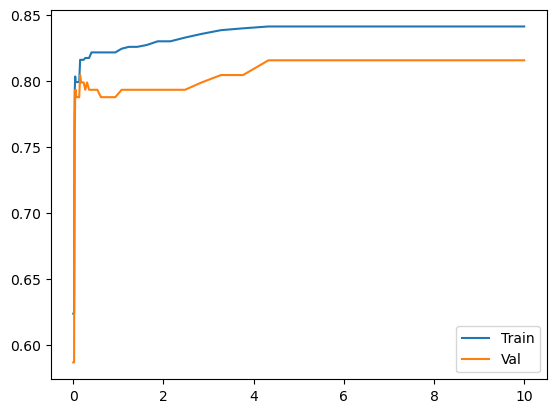

In [ ]:
params = np.logspace(-5, 1, 100)

train_acc = []
val_acc = []

for param in params:
    clf = SVC(C=param)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    val_acc.append(accuracy_score(y_val, clf.predict(X_val)))

plt.plot(params, train_acc, label='Train')
plt.plot(params, val_acc, label='Val')
plt.legend()
plt.show()
    

In [ ]:
svm_clf = SVC(C=params[val_acc.index(max(val_acc))])
svm_clf.fit(X_train, y_train)

val_score(svm_clf, X_val, y_val)

model: SVC(C=4.328761281083062)
accuracy: 0.8156424581005587
f1: 0.744186046511628


In [ ]:
submission = pd.DataFrame(svm_clf.predict(X_test), index=test_df.index, columns=['Survived'])
submission.to_csv('submission.csv')

<h4 id="sub_section2_1">ii. KNN Classifier</h4>

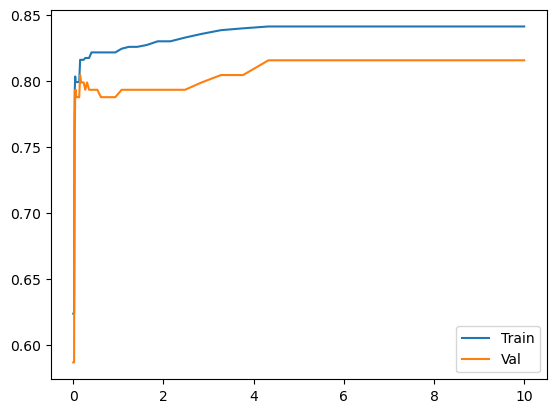

In [ ]:
params = np.logspace(-5, 1, 100)

train_acc = []
val_acc = []

for param in params:
    clf = SVC(C=param)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    val_acc.append(accuracy_score(y_val, clf.predict(X_val)))
    
plt.plot(params, train_acc, label='Train')
plt.plot(params, val_acc, label='Val')
plt.legend()
plt.show()

In [ ]:
# Import KNN classifier and metric F1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


# Creating instance of KNN
clf = KNN(n_neighbors = 10)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7204968944099379


In [ ]:
# Function to find the best value of K
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [ ]:
#Defining K range
k = range(6, 20, 2)
# calling above defined function
test = Elbow(k)



In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 6)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.7225806451612903


In [ ]:
submission_predictions = clf.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [ ]:
df_submission['Survived'] = submission_predictions
df_submission.to_csv('submission_knn.csv', index=False)

<h4 id="sub_section2_2">iii. Logistic Regression</h4>

In [ ]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creating instance of Logistic Regression
log_reg = LogisticRegression()

# Fitting the model
log_reg.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_log = log_reg.predict(test_x)
k_log = f1_score(test_predict_log, test_y)

print('Test F1 Score    ', k_log )

Test F1 Score     0.6820809248554913


In [ ]:
submission_predictions_log = log_reg.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [ ]:
# Combine predics with df_submission and save to csv
df_submission['Survived'] = submission_predictions_log
df_submission.to_csv('submission_log.csv', index=False)

<h4 id="sub_section2_3">iV. Decision Tree Classifier</h4>

In [ ]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Creating instance of Decision Tree Classifier
clf = DecisionTreeClassifier()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_dt = clf.predict(test_x)
k_dt = f1_score(test_predict_dt, test_y)

print('Test F1 Score    ', k_dt )

Test F1 Score     0.6666666666666666


In [ ]:
submission_predictions_dt = clf.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [ ]:
# Combine predictions with df_submission and save to csv
df_submission['Survived'] = submission_predictions_dt
df_submission.to_csv('submission_dt.csv', index=False)

<h4 id="sub_section2_4">v. MLPClassifier</h4>

In [ ]:
# Importing MLPC Classifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Creating instance of MLPC Classifier
clf = MLPClassifier()

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Test Set and calculating F1
test_predict_mlpc = clf.predict(test_x)
k_mlpc = f1_score(test_predict_mlpc, test_y)

print('Test F1 Score    ', k_mlpc )

Test F1 Score     0.725


In [ ]:
submission_predictions_mlpc = clf.predict(df_test_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1))

In [ ]:
# Combine predictions with df_submission and save to csv
df_submission['Survived'] = submission_predictions_mlpc
df_submission.to_csv('submission_mlpc.csv', index=False)

Cite from 
https://www.kaggle.com/code/yaoeee/svc-model-acc-0-7799
https://github.com/kaggle/docker-python
https://www.kaggle.com/code/jothsnamuralidharan/titanic-survival-prediction